<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019_projects/blob/master/HeartPatient_BasakSurajit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the data as a csv file
import pandas as pd
from io import StringIO

heart_disease_raw_data = """
"id","age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope"
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
6,56,1,2,120,236,0,0,178,0,0.8,1
7,62,0,4,140,268,0,2,160,0,3.6,3
8,57,0,4,120,354,0,0,163,1,0.6,1
9,63,1,4,130,254,0,2,147,0,1.4,2
10,53,1,4,140,203,1,2,155,1,3.1,3
11,57,1,4,140,192,0,0,148,0,0.4,2
12,56,0,2,140,294,0,2,153,0,1.3,2
13,56,1,3,130,256,1,2,142,1,0.6,2
14,44,1,2,120,263,0,0,173,0,0,1
15,52,1,3,172,199,1,0,162,0,0.5,1
16,57,1,3,150,168,0,0,174,0,1.6,1
17,48,1,2,110,229,0,0,168,0,1,3
18,54,1,4,140,239,0,0,160,0,1.2,1
19,48,0,3,130,275,0,0,139,0,0.2,1
20,49,1,2,130,266,0,0,171,0,0.6,1
21,64,1,1,110,211,0,2,144,1,1.8,2
22,58,0,1,150,283,1,2,162,0,1,1
23,58,1,2,120,284,0,2,160,0,1.8,2
24,58,1,3,132,224,0,2,173,0,3.2,1
25,60,1,4,130,206,0,2,132,1,2.4,2
26,50,0,3,120,219,0,0,158,0,1.6,2
27,58,0,3,120,340,0,0,172,0,0,1
28,66,0,1,150,226,0,0,114,0,2.6,3
29,43,1,4,150,247,0,0,171,0,1.5,1
30,40,1,4,110,167,0,2,114,1,2,2
31,69,0,1,140,239,0,0,151,0,1.8,1
32,60,1,4,117,230,1,0,160,1,1.4,1
33,64,1,3,140,335,0,0,158,0,0,1
34,59,1,4,135,234,0,0,161,0,0.5,2
35,44,1,3,130,233,0,0,179,1,0.4,1
36,42,1,4,140,226,0,0,178,0,0,1
37,43,1,4,120,177,0,2,120,1,2.5,2
38,57,1,4,150,276,0,2,112,1,0.6,2
39,55,1,4,132,353,0,0,132,1,1.2,2
40,61,1,3,150,243,1,0,137,1,1,2
41,65,0,4,150,225,0,2,114,0,1,2
42,40,1,1,140,199,0,0,178,1,1.4,1
43,71,0,2,160,302,0,0,162,0,0.4,1
44,59,1,3,150,212,1,0,157,0,1.6,1
45,61,0,4,130,330,0,2,169,0,0,1
46,58,1,3,112,230,0,2,165,0,2.5,2
47,51,1,3,110,175,0,0,123,0,0.6,1
48,50,1,4,150,243,0,2,128,0,2.6,2
49,65,0,3,140,417,1,2,157,0,0.8,1
50,53,1,3,130,197,1,2,152,0,1.2,3
51,41,0,2,105,198,0,0,168,0,0,1
52,65,1,4,120,177,0,0,140,0,0.4,1
53,44,1,4,112,290,0,2,153,0,0,1
54,44,1,2,130,219,0,2,188,0,0,1
55,60,1,4,130,253,0,0,144,1,1.4,1
56,54,1,4,124,266,0,2,109,1,2.2,2
57,50,1,3,140,233,0,0,163,0,0.6,2
58,41,1,4,110,172,0,2,158,0,0,1
59,54,1,3,125,273,0,2,152,0,0.5,3
60,51,1,1,125,213,0,2,125,1,1.4,1
61,51,0,4,130,305,0,0,142,1,1.2,2
62,46,0,3,142,177,0,2,160,1,1.4,3
63,58,1,4,128,216,0,2,131,1,2.2,2
64,54,0,3,135,304,1,0,170,0,0,1
65,54,1,4,120,188,0,0,113,0,1.4,2
66,60,1,4,145,282,0,2,142,1,2.8,2
67,60,1,3,140,185,0,2,155,0,3,2
68,54,1,3,150,232,0,2,165,0,1.6,1
69,59,1,4,170,326,0,2,140,1,3.4,3
70,46,1,3,150,231,0,0,147,0,3.6,2
71,65,0,3,155,269,0,0,148,0,0.8,1
72,67,1,4,125,254,1,0,163,0,0.2,2
73,62,1,4,120,267,0,0,99,1,1.8,2
74,65,1,4,110,248,0,2,158,0,0.6,1
75,44,1,4,110,197,0,2,177,0,0,1
76,65,0,3,160,360,0,2,151,0,0.8,1
77,60,1,4,125,258,0,2,141,1,2.8,2
78,51,0,3,140,308,0,2,142,0,1.5,1
79,48,1,2,130,245,0,2,180,0,0.2,2
80,58,1,4,150,270,0,2,111,1,0.8,1
81,45,1,4,104,208,0,2,148,1,3,2
82,53,0,4,130,264,0,2,143,0,0.4,2
83,39,1,3,140,321,0,2,182,0,0,1
84,68,1,3,180,274,1,2,150,1,1.6,2
85,52,1,2,120,325,0,0,172,0,0.2,1
86,44,1,3,140,235,0,2,180,0,0,1
87,47,1,3,138,257,0,2,156,0,0,1
88,53,0,3,128,216,0,2,115,0,0,1
89,53,0,4,138,234,0,2,160,0,0,1
90,51,0,3,130,256,0,2,149,0,0.5,1
91,66,1,4,120,302,0,2,151,0,0.4,2
92,62,0,4,160,164,0,2,145,0,6.2,3
93,62,1,3,130,231,0,0,146,0,1.8,2
94,44,0,3,108,141,0,0,175,0,0.6,2
95,63,0,3,135,252,0,2,172,0,0,1
96,52,1,4,128,255,0,0,161,1,0,1
97,59,1,4,110,239,0,2,142,1,1.2,2
98,60,0,4,150,258,0,2,157,0,2.6,2
99,52,1,2,134,201,0,0,158,0,0.8,1
100,48,1,4,122,222,0,2,186,0,0,1
101,45,1,4,115,260,0,2,185,0,0,1
102,34,1,1,118,182,0,2,174,0,0,1
103,57,0,4,128,303,0,2,159,0,0,1
104,71,0,3,110,265,1,2,130,0,0,1
105,49,1,3,120,188,0,0,139,0,2,2
106,54,1,2,108,309,0,0,156,0,0,1
107,59,1,4,140,177,0,0,162,1,0,1
108,57,1,3,128,229,0,2,150,0,0.4,2
109,61,1,4,120,260,0,0,140,1,3.6,2
110,39,1,4,118,219,0,0,140,0,1.2,2
111,61,0,4,145,307,0,2,146,1,1,2
112,56,1,4,125,249,1,2,144,1,1.2,2
113,52,1,1,118,186,0,2,190,0,0,2
114,43,0,4,132,341,1,2,136,1,3,2
115,62,0,3,130,263,0,0,97,0,1.2,2
116,41,1,2,135,203,0,0,132,0,0,2
117,58,1,3,140,211,1,2,165,0,0,1
118,35,0,4,138,183,0,0,182,0,1.4,1
119,63,1,4,130,330,1,2,132,1,1.8,1
120,65,1,4,135,254,0,2,127,0,2.8,2
121,48,1,4,130,256,1,2,150,1,0,1
122,63,0,4,150,407,0,2,154,0,4,2
123,51,1,3,100,222,0,0,143,1,1.2,2
124,55,1,4,140,217,0,0,111,1,5.6,3
125,65,1,1,138,282,1,2,174,0,1.4,2
126,45,0,2,130,234,0,2,175,0,0.6,2
127,56,0,4,200,288,1,2,133,1,4,3
128,54,1,4,110,239,0,0,126,1,2.8,2
129,44,1,2,120,220,0,0,170,0,0,1
130,62,0,4,124,209,0,0,163,0,0,1
131,54,1,3,120,258,0,2,147,0,0.4,2
132,51,1,3,94,227,0,0,154,1,0,1
133,29,1,2,130,204,0,2,202,0,0,1
134,51,1,4,140,261,0,2,186,1,0,1
135,43,0,3,122,213,0,0,165,0,0.2,2
136,55,0,2,135,250,0,2,161,0,1.4,2
137,70,1,4,145,174,0,0,125,1,2.6,3
138,62,1,2,120,281,0,2,103,0,1.4,2
139,35,1,4,120,198,0,0,130,1,1.6,2
140,51,1,3,125,245,1,2,166,0,2.4,2
141,59,1,2,140,221,0,0,164,1,0,1
142,59,1,1,170,288,0,2,159,0,0.2,2
143,52,1,2,128,205,1,0,184,0,0,1
144,64,1,3,125,309,0,0,131,1,1.8,2
145,58,1,3,105,240,0,2,154,1,0.6,2
146,47,1,3,108,243,0,0,152,0,0,1
147,57,1,4,165,289,1,2,124,0,1,2
148,41,1,3,112,250,0,0,179,0,0,1
149,45,1,2,128,308,0,2,170,0,0,1
150,60,0,3,102,318,0,0,160,0,0,1
151,52,1,1,152,298,1,0,178,0,1.2,2
152,42,0,4,102,265,0,2,122,0,0.6,2
153,67,0,3,115,564,0,2,160,0,1.6,2
154,55,1,4,160,289,0,2,145,1,0.8,2
155,64,1,4,120,246,0,2,96,1,2.2,3
156,70,1,4,130,322,0,2,109,0,2.4,2
157,51,1,4,140,299,0,0,173,1,1.6,1
158,58,1,4,125,300,0,2,171,0,0,1
159,60,1,4,140,293,0,2,170,0,1.2,2
160,68,1,3,118,277,0,0,151,0,1,1
161,46,1,2,101,197,1,0,156,0,0,1
162,77,1,4,125,304,0,2,162,1,0,1
163,54,0,3,110,214,0,0,158,0,1.6,2
164,58,0,4,100,248,0,2,122,0,1,2
165,48,1,3,124,255,1,0,175,0,0,1
166,57,1,4,132,207,0,0,168,1,0,1
167,52,1,3,138,223,0,0,169,0,0,1
168,54,0,2,132,288,1,2,159,1,0,1
169,35,1,4,126,282,0,2,156,1,0,1
170,45,0,2,112,160,0,0,138,0,0,2
171,70,1,3,160,269,0,0,112,1,2.9,2
172,53,1,4,142,226,0,2,111,1,0,1
173,59,0,4,174,249,0,0,143,1,0,2
174,62,0,4,140,394,0,2,157,0,1.2,2
175,64,1,4,145,212,0,2,132,0,2,2
176,57,1,4,152,274,0,0,88,1,1.2,2
177,52,1,4,108,233,1,0,147,0,0.1,1
178,56,1,4,132,184,0,2,105,1,2.1,2
179,43,1,3,130,315,0,0,162,0,1.9,1
180,53,1,3,130,246,1,2,173,0,0,1
181,48,1,4,124,274,0,2,166,0,0.5,2
182,56,0,4,134,409,0,2,150,1,1.9,2
183,42,1,1,148,244,0,2,178,0,0.8,1
184,59,1,1,178,270,0,2,145,0,4.2,3
185,60,0,4,158,305,0,2,161,0,0,1
186,63,0,2,140,195,0,0,179,0,0,1
187,42,1,3,120,240,1,0,194,0,0.8,3
188,66,1,2,160,246,0,0,120,1,0,2
189,54,1,2,192,283,0,2,195,0,0,1
190,69,1,3,140,254,0,2,146,0,2,2
191,50,1,3,129,196,0,0,163,0,0,1
192,51,1,4,140,298,0,0,122,1,4.2,2
193,43,1,4,132,247,1,2,143,1,0.1,2
194,62,0,4,138,294,1,0,106,0,1.9,2
195,68,0,3,120,211,0,2,115,0,1.5,2
196,67,1,4,100,299,0,2,125,1,0.9,2
197,69,1,1,160,234,1,2,131,0,0.1,2
198,45,0,4,138,236,0,2,152,1,0.2,2
199,50,0,2,120,244,0,0,162,0,1.1,1
200,59,1,1,160,273,0,2,125,0,0,1
201,50,0,4,110,254,0,2,159,0,0,1
202,64,0,4,180,325,0,0,154,1,0,1
203,57,1,3,150,126,1,0,173,0,0.2,1
204,64,0,3,140,313,0,0,133,0,0.2,1
205,43,1,4,110,211,0,0,161,0,0,1
206,45,1,4,142,309,0,2,147,1,0,2
207,58,1,4,128,259,0,2,130,1,3,2
208,50,1,4,144,200,0,2,126,1,0.9,2
209,55,1,2,130,262,0,0,155,0,0,1
210,62,0,4,150,244,0,0,154,1,1.4,2
211,37,0,3,120,215,0,0,170,0,0,1
212,38,1,1,120,231,0,0,182,1,3.8,2
213,41,1,3,130,214,0,2,168,0,2,2
214,66,0,4,178,228,1,0,165,1,1,2
215,52,1,4,112,230,0,0,160,0,0,1
216,56,1,1,120,193,0,2,162,0,1.9,2
217,46,0,2,105,204,0,0,172,0,0,1
218,46,0,4,138,243,0,2,152,1,0,2
219,64,0,4,130,303,0,0,122,0,2,2
220,59,1,4,138,271,0,2,182,0,0,1
221,41,0,3,112,268,0,2,172,1,0,1
222,54,0,3,108,267,0,2,167,0,0,1
223,39,0,3,94,199,0,0,179,0,0,1
224,53,1,4,123,282,0,0,95,1,2,2
225,63,0,4,108,269,0,0,169,1,1.8,2
226,34,0,2,118,210,0,0,192,0,0.7,1
227,47,1,4,112,204,0,0,143,0,0.1,1
228,67,0,3,152,277,0,0,172,0,0,1
229,54,1,4,110,206,0,2,108,1,0,2
230,66,1,4,112,212,0,2,132,1,0.1,1
231,52,0,3,136,196,0,2,169,0,0.1,2
232,55,0,4,180,327,0,1,117,1,3.4,2
233,49,1,3,118,149,0,2,126,0,0.8,1
234,74,0,2,120,269,0,2,121,1,0.2,1
235,54,0,3,160,201,0,0,163,0,0,1
236,54,1,4,122,286,0,2,116,1,3.2,2
237,56,1,4,130,283,1,2,103,1,1.6,3
238,46,1,4,120,249,0,2,144,0,0.8,1
239,49,0,2,134,271,0,0,162,0,0,2
240,42,1,2,120,295,0,0,162,0,0,1
241,41,1,2,110,235,0,0,153,0,0,1
242,41,0,2,126,306,0,0,163,0,0,1
243,49,0,4,130,269,0,0,163,0,0,1
244,61,1,1,134,234,0,0,145,0,2.6,2
245,60,0,3,120,178,1,0,96,0,0,1
246,67,1,4,120,237,0,0,71,0,1,2
247,58,1,4,100,234,0,0,156,0,0.1,1
248,47,1,4,110,275,0,2,118,1,1,2
249,52,1,4,125,212,0,0,168,0,1,1
250,62,1,2,128,208,1,2,140,0,0,1
251,57,1,4,110,201,0,0,126,1,1.5,2
252,58,1,4,146,218,0,0,105,0,2,2
253,64,1,4,128,263,0,0,105,1,0.2,2
254,51,0,3,120,295,0,2,157,0,0.6,1
255,43,1,4,115,303,0,0,181,0,1.2,2
256,42,0,3,120,209,0,0,173,0,0,2
257,67,0,4,106,223,0,0,142,0,0.3,1
258,76,0,3,140,197,0,1,116,0,1.1,2
259,70,1,2,156,245,0,2,143,0,0,1
260,57,1,2,124,261,0,0,141,0,0.3,1
261,44,0,3,118,242,0,0,149,0,0.3,2
262,58,0,2,136,319,1,2,152,0,0,1
263,60,0,1,150,240,0,0,171,0,0.9,1
264,44,1,3,120,226,0,0,169,0,0,1
265,61,1,4,138,166,0,2,125,1,3.6,2
266,42,1,4,136,315,0,0,125,1,1.8,2
267,52,1,4,128,204,1,0,156,1,1,2
268,59,1,3,126,218,1,0,134,0,2.2,2
269,40,1,4,152,223,0,0,181,0,0,1
270,42,1,3,130,180,0,0,150,0,0,1
271,61,1,4,140,207,0,2,138,1,1.9,1
272,66,1,4,160,228,0,2,138,0,2.3,1
273,46,1,4,140,311,0,0,120,1,1.8,2
274,71,0,4,112,149,0,0,125,0,1.6,2
275,59,1,1,134,204,0,0,162,0,0.8,1
276,64,1,1,170,227,0,2,155,0,0.6,2
277,66,0,3,146,278,0,2,152,0,0,2
278,39,0,3,138,220,0,0,152,0,0,2
279,57,1,2,154,232,0,2,164,0,0,1
280,58,0,4,130,197,0,0,131,0,0.6,2
281,57,1,4,110,335,0,0,143,1,3,2
282,47,1,3,130,253,0,0,179,0,0,1
283,55,0,4,128,205,0,1,130,1,2,2
284,35,1,2,122,192,0,0,174,0,0,1
285,61,1,4,148,203,0,0,161,0,0,1
286,58,1,4,114,318,0,1,140,0,4.4,3
287,58,0,4,170,225,1,2,146,1,2.8,2
288,58,1,2,125,220,0,0,144,0,0.4,2
289,56,1,2,130,221,0,2,163,0,0,1
290,56,1,2,120,240,0,0,169,0,0,3
291,67,1,3,152,212,0,2,150,0,0.8,2
292,55,0,2,132,342,0,0,166,0,1.2,1
293,44,1,4,120,169,0,0,144,1,2.8,3
294,63,1,4,140,187,0,2,144,1,4,1
295,63,0,4,124,197,0,0,136,1,0,2
296,41,1,2,120,157,0,0,182,0,0,1
297,59,1,4,164,176,1,2,90,0,1,2
298,57,0,4,140,241,0,0,123,1,0.2,2
299,45,1,1,110,264,0,0,132,0,1.2,2
300,68,1,4,144,193,1,0,141,0,3.4,2
301,57,1,4,130,131,0,0,115,1,1.2,2
302,57,0,2,130,236,0,2,174,0,0,2
303,38,1,3,138,175,0,0,173,0,0,1
"""

heart_disease = pd.read_csv(StringIO(heart_disease_raw_data))

print(heart_disease.tail())





      id  age  sex  cp  trestbps  ...  restecg  thalach  exang  oldpeak  slope
298  299   45    1   1       110  ...        0      132      0      1.2      2
299  300   68    1   4       144  ...        0      141      0      3.4      2
300  301   57    1   4       130  ...        0      115      1      1.2      2
301  302   57    0   2       130  ...        2      174      0      0.0      2
302  303   38    1   3       138  ...        0      173      0      0.0      1

[5 rows x 12 columns]


In [ ]:
#exploring the data(EDA)

from sklearn.preprocessing import MinMaxScaler


print(heart_disease.head())
print(heart_disease.info())
print(heart_disease.describe())

heart_disease = heart_disease.drop('id', axis=1)
scaler = MinMaxScaler()

scaled = pd.DataFrame(scaler.fit_transform(heart_disease), columns=heart_disease.columns)

print(scaled)


   id  age  sex  cp  trestbps  ...  restecg  thalach  exang  oldpeak  slope
0   1   63    1   1       145  ...        2      150      0      2.3      3
1   2   67    1   4       160  ...        2      108      1      1.5      2
2   3   67    1   4       120  ...        2      129      1      2.6      2
3   4   37    1   3       130  ...        0      187      0      3.5      3
4   5   41    0   2       130  ...        2      172      0      1.4      1

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-nul

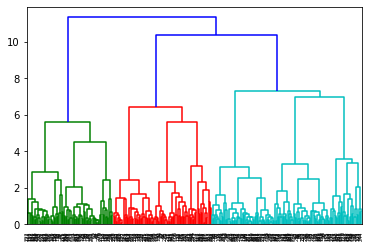

In [ ]:
#drawing the dendogram to get an idea of cluster distribution
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(scaled, method = 'ward', metric = 'euclidean')

dn = dendrogram(Z)
plt.show()

In [ ]:
#Generate cluster predictions using best of 10 different random seeds 

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,  n_init=10)
model = k_means.fit(scaled)
y = k_means.predict(scaled)

print(y)

[2 1 1 0 2 0 2 1 2 1 0 2 1 0 0 0 0 0 0 0 1 2 2 2 1 0 0 0 0 1 0 1 0 0 1 0 1
 1 1 1 2 1 0 0 2 2 0 2 2 2 0 0 2 2 1 1 0 2 2 1 1 1 1 0 0 1 2 2 1 0 0 0 1 2
 2 2 1 2 2 1 1 2 2 1 0 2 2 2 2 2 2 2 0 0 2 1 1 2 0 2 2 2 2 2 0 0 1 2 1 0 1
 1 2 1 0 0 2 0 1 2 1 2 1 1 2 2 1 1 0 0 2 1 2 1 0 2 1 2 1 2 1 2 0 1 1 0 2 0
 2 0 0 2 2 1 1 2 1 2 2 0 0 1 0 2 0 1 0 1 1 0 1 1 1 2 2 1 0 1 0 2 2 1 2 2 2
 0 0 1 2 2 0 1 1 0 2 1 2 1 0 2 2 1 0 0 0 1 1 1 0 1 0 1 2 1 0 2 0 1 0 2 1 2
 0 1 1 0 0 0 1 1 2 1 2 1 0 1 1 2 0 0 0 0 0 0 0 0 0 1 0 2 1 0 1 2 0 0 0 2 2
 0 0 2 0 0 1 1 1 0 0 0 1 2 1 0 0 2 2 0 2 0 1 0 1 0 0 2 1 0 2 0 2 0 1 1 1 0
 2 1 0 0 1 2 0]


In [ ]:
#Calculating the silhouette coefficient

from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(scaled, labels, metric = 'euclidean')

0.24815847765704113

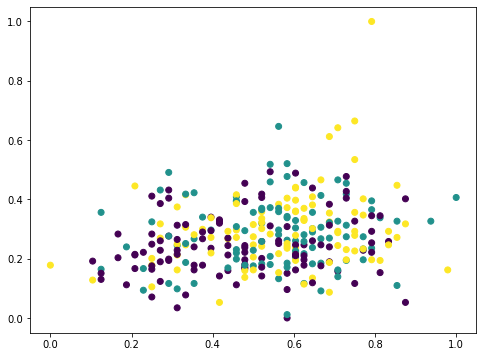

In [ ]:
#comparing the stability of KMeans 
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(scaled['age'], scaled['chol'], c=model.labels_.astype(float))

In [ ]:
#Generate cluster predictions using best of 20 different random seeds

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,  n_init=20)
model2 = k_means.fit(scaled)
y = k_means.predict(scaled)

print(y)

[0 2 2 1 0 1 0 2 0 2 1 0 2 1 1 1 1 1 1 1 2 0 0 0 2 1 1 1 1 2 1 2 1 1 2 1 2
 2 2 2 0 2 1 1 0 0 1 0 0 0 1 1 0 0 2 2 1 0 0 2 2 2 2 1 1 2 0 0 2 1 1 1 2 0
 0 0 2 0 0 2 2 0 0 2 1 0 0 0 0 0 0 0 1 1 0 2 2 0 1 0 0 0 0 0 1 1 2 0 2 1 2
 2 0 2 1 1 0 1 2 0 2 0 2 2 0 0 2 2 1 1 0 2 0 2 1 0 2 0 2 0 2 0 1 2 2 1 0 1
 0 1 1 0 0 2 2 0 2 0 0 1 1 2 1 0 1 2 1 2 2 1 2 2 2 0 0 2 1 2 1 0 0 2 0 0 0
 1 1 2 0 0 1 2 2 1 0 2 0 2 1 0 0 2 1 1 1 2 2 2 1 2 1 2 0 2 1 0 1 2 1 0 2 0
 1 2 2 1 1 1 2 2 0 2 0 2 1 2 2 0 1 1 1 1 1 1 1 1 1 2 1 0 2 1 2 0 1 1 1 0 0
 1 1 0 1 1 2 2 2 1 1 1 2 0 2 1 1 0 0 1 0 1 2 1 2 1 1 0 2 1 0 1 0 1 2 2 2 1
 0 2 1 1 2 0 1]


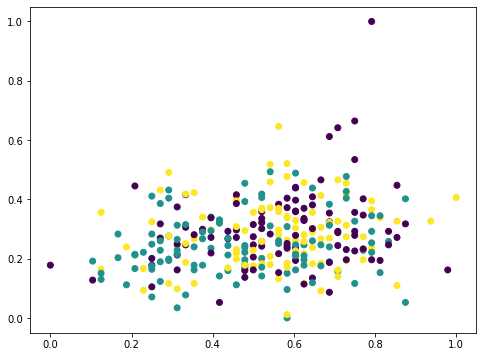

In [ ]:
#comparing the stability of KMeans 
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(scaled['age'], scaled['chol'], c=model2.labels_.astype(float))

In [ ]:
#Using Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
hcmodel = hc.fit(scaled)
hcy = hc.fit_predict(scaled)
print(hcy)

[0 1 1 0 2 0 2 2 0 1 0 2 1 0 0 0 0 0 2 0 1 0 0 0 1 2 2 2 0 1 2 1 0 0 1 0 1
 1 1 1 2 1 2 0 2 0 0 0 0 0 2 0 0 0 1 1 0 0 0 1 2 2 1 0 0 1 0 0 1 0 2 0 1 0
 0 2 1 2 0 1 1 2 0 1 0 0 0 2 2 2 0 2 0 2 2 1 1 2 0 0 0 0 2 0 0 0 1 0 1 0 2
 1 0 2 2 0 0 2 1 0 1 2 1 1 0 2 2 1 0 2 0 1 0 1 2 2 1 0 1 0 1 0 0 1 1 0 0 0
 0 2 0 2 2 1 1 0 1 0 0 0 0 1 2 2 0 1 0 2 1 2 1 1 2 2 0 1 0 1 0 0 0 2 0 0 2
 2 0 1 0 0 0 1 1 0 2 1 0 2 2 0 2 2 0 2 0 1 1 1 0 2 2 1 0 1 0 0 2 2 2 0 2 2
 2 1 2 2 0 2 1 1 2 2 0 2 2 1 1 0 2 0 0 2 2 0 0 0 0 1 0 0 1 0 1 2 0 2 2 2 0
 0 2 0 2 0 1 1 1 0 0 0 1 0 1 2 0 0 2 2 0 2 1 0 2 0 0 0 2 0 0 0 0 2 1 1 2 0
 0 2 0 0 1 2 0]


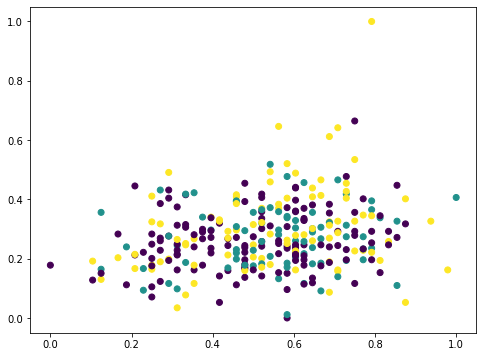

In [ ]:
#A similar plot using Hierarchical Clustering to compare with KMeans
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(scaled['age'], scaled['chol'], c=hcmodel.labels_.astype(float))